# Simple scenario

## Introduction

This notebook is based on the "create_simple_scenario" scenario. It expands its functionality by including the generation of an electricity grid using a grid topology.

HAMLET allows the user to create a grid topology and assign agents to it after they are created. In contrast, when creating the scenario from the grid file, the agents and their devices are also defined there. 

### Required Files

The scenario setup uses the following files:
- **YAML files:** Define configuration for agents (`agents.yaml`), grids (`grids.yaml`), markets (`markets.yaml`), and scenario setup (`setup.yaml`).
- **Excel files:** Contain structured data for agents (`agents.xlsx`) and the grid topology (`typology.xlsx`).

All files are placed in a structured folder (`scenario_with_topology`). Its name will automatically be used for the scenario name (unless overwritten).

In [1]:
from hamlet import Creator, Executor, Analyzer

## Step 1: Scenario Creation

This step generates the scenario based on YAML and Excel configurations. This time we use the `agents.xlsx` file directly to create the scenario instead of creating one from the `agents.yaml` file.

In [2]:
# Path to the scenario configuration folder
name = "scenario_with_topology"
path_configs = f"./{name}"

In [6]:
# Instantiate Creator and generate the scenario
creator = Creator(path=path_configs)
creator.new_scenario_from_files()



Successfully created scenario: 100%|██████████| 7/7 [01:48<00:00, 15.54s/it]


  0%|          | 0/7 [00:00<?, ?it/s]

Creating the folders for the scenario::   0%|          | 0/7 [00:00<?, ?it/s]

Creating the folders for the scenario::  14%|█▍        | 1/7 [00:00<00:00,  9.20it/s]

Creating the markets for each region::  14%|█▍        | 1/7 [00:00<00:00,  9.20it/s] 

Creating the markets for each region: scenario_with_topology:  14%|█▍        | 1/7 [00:00<00:00,  9.20it/s]

Creating the markets for each region: scenario_with_topology:  29%|██▊       | 2/7 [00:00<00:00,  7.84it/s]

Creating the markets for each region::  29%|██▊       | 2/7 [00:00<00:00,  7.84it/s]                       

Creating the agents for each region::  29%|██▊       | 2/7 [00:00<00:00,  7.84it/s] 

Creating the agents for each region: scenario_with_topology:  29%|██▊       | 2/7 [00:00<00:00,  7.84it/s]

Creating the agents for each region: scenario_with_topology:  43%|████▎     | 3/7 [00:01<00:02,  1.68it/s]

## Step 2: Assign Agents to Grid

Once the scenario is created, the agents can be assigned to the grid. You can assign multiple agents to the same node. Follow the steps below to assign agents to the grid:

1. Open the `topology.xlsx` file in Excel. You can find it under `./scenarios/scenario_with_topology/grids/electricity/topology.xlsx`.
2. Navigate to the `bus` tab.
3. Assign the agent IDs to the corresponding bus IDs. Use the `agent` column. If you want to assign more than one agent to a bus, you need to add more columns starting with `agent`. You need to add one agent ID per column.

Note: You can find the agent IDs in the `general/agent_ID` column of the `agents.xlsx` file which can be found under `./scenarios/scenario_with_topology/config/agents.xlsx`.

An example on how this can be done is shown in `topology_assigned.xlsx` which is located in the `market_with_topology` folder.


## Step 3: Scenario Execution

Execute the scenario created previously. Hamlet runs the defined scenario and produces results.

The `num_workers` parameter defines how many CPU cores to use for simulation. It is set to one to not call multiprocessing. To use multiprocessing you preferably call it from a python file using the following command:

```python

if __name__ == "__main__":
    sim = Executor(path)
    sim.run()


In [4]:
# Path to the scenario created
path_scenario = f"../../scenarios/{name}"

In [8]:
# Instantiate Executor and run the simulation
executor = Executor(path_scenario, num_workers=1)
executor.run()


0it [00:00, ?it/s]
Start execution:   0%|          | 0/24 [00:00<?, ?it/s]
Executing timestamp 2021-03-23 23:00:00+00:00 for region_tasks scenario_with_topology:   0%|          | 0/24 [00:00<?, ?it/s]
Executing timestamp 2021-03-23 23:00:00+00:00 for grid:   0%|          | 0/24 [00:04<?, ?it/s]                               
Executing timestamp 2021-03-23 23:00:00+00:00 for grid:   4%|▍         | 1/24 [00:05<01:58,  5.14s/it]
Executing timestamp 2021-03-24 00:00:00+00:00 for region_tasks scenario_with_topology:   4%|▍         | 1/24 [00:05<01:58,  5.14s/it]
Executing timestamp 2021-03-24 00:00:00+00:00 for grid:   4%|▍         | 1/24 [00:07<01:58,  5.14s/it]                               
Executing timestamp 2021-03-24 00:00:00+00:00 for grid:   8%|▊         | 2/24 [00:07<01:18,  3.58s/it]
Executing timestamp 2021-03-24 01:00:00+00:00 for region_tasks scenario_with_topology:   8%|▊         | 2/24 [00:07<01:18,  3.58s/it]
Executing timestamp 2021-03-24 01:00:00+00:00 for grid:   8%|▊  

## Step 4: Scenario Analysis

Analyze and visualize the results obtained from scenario execution.

The analysis provides visual insights into scenario outcomes, which helps understand scenario dynamics and performance.

In [9]:
# Path to simulation results (you can add multiple results for plots that compare different scenarios)
path_results = {name: f"../../results/{name}"}

In [10]:
# Create the analyzer object
sim = Analyzer(path_results)

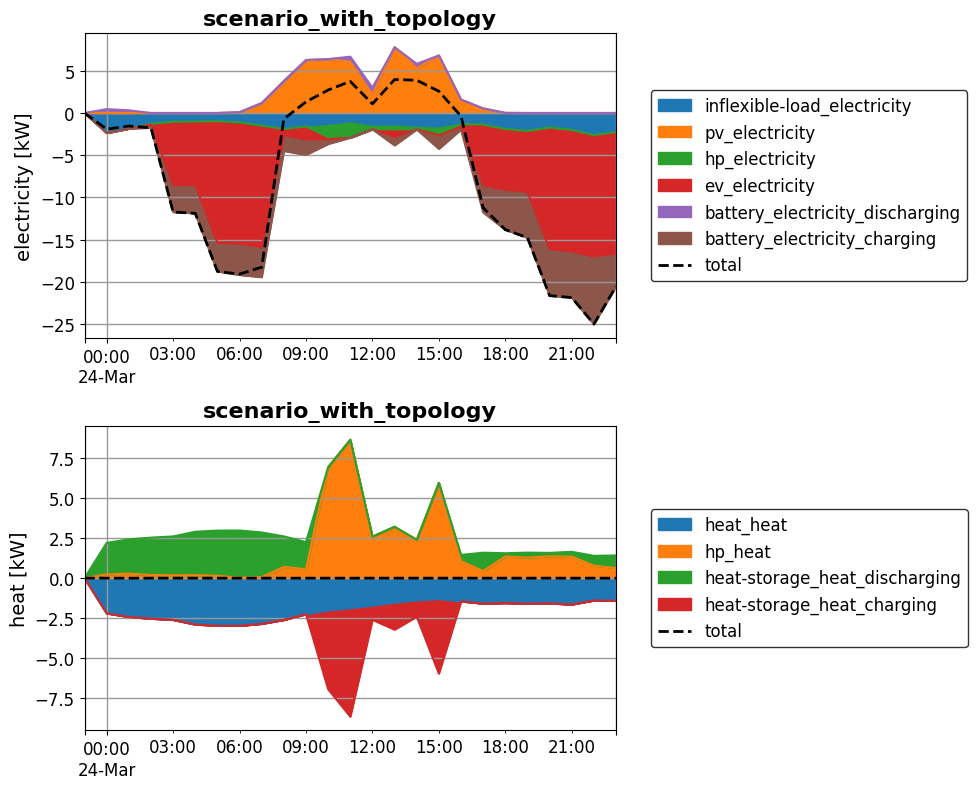

<function hamlet.analyzer.agents.agent_plotter.AgentPlotter.plot_all_meters_data(self, **kwargs)>

In [11]:
# Plot all meters data for the agents, i.e. when was energy produced and consumed
sim.agents.plot_all_meters_data(save_path=None)  # save_path is None by default

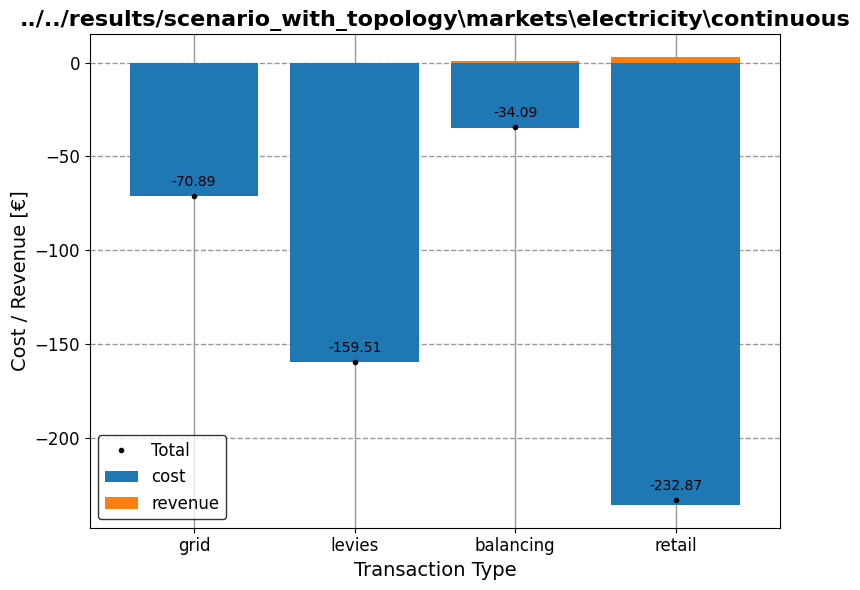

<function hamlet.analyzer.markets.market_plotter.MarketPlotter.plot_total_balancing(self, **kwargs)>

In [12]:
# Plot the total costs and revenues of each energy price component
sim.markets.plot_total_balancing()

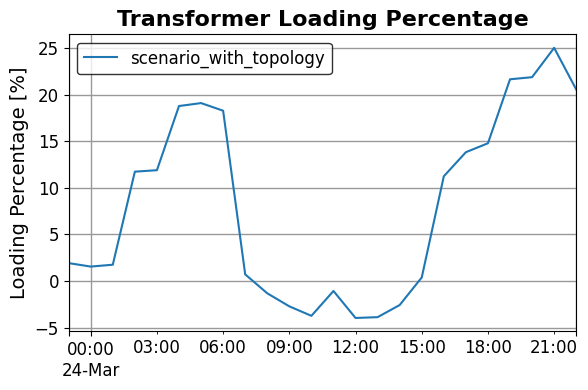

<function hamlet.analyzer.grids.grid_plotter.GridPlotter.plot_electricity_transformer_loading(self, **kwargs)>

In [16]:
# Plot the transformer loading of the grid
sim.grids.plot_electricity_transformer_loading()